# Fidelity analysis

## BOX diagram IDEAL
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

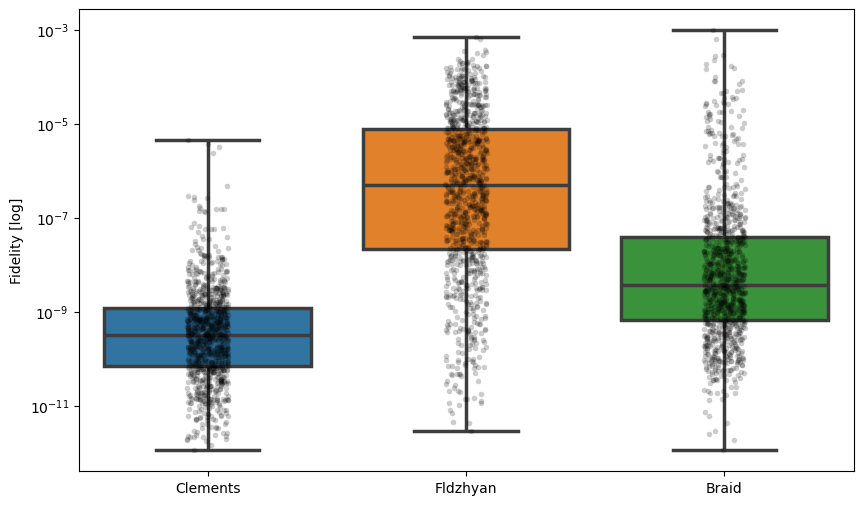

In [72]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

# Download the file
min_arct = []
q25_arct = []
q50_arct = []
q75_arct = []
max_arct = []
fidelities_box = []
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q0 = [np.percentile(fid, 0) for fid in fidelities]      # Min
    q25 = [np.percentile(fid, 25) for fid in fidelities]    # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]    # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]    # 3rd Quartile (Q3)
    q100 = [np.percentile(fid, 100) for fid in fidelities]  # Max
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)

    fidelities_box.append([1-fid for fid in fidelities[6]])

data = {
    names_arct[0]: fidelities_box[0],
    names_arct[1]: fidelities_box[1],
    names_arct[2]: fidelities_box[2],
}

# Create DataFrame
df = pd.DataFrame(data)
# Melt DataFrame into long format for easier plotting
df_long = df.melt(var_name='Category', value_name='Value')

# Set up the figure size
plt.figure(figsize=(10, 6))
# Create the box plot with a logarithmic y-axis
sns.boxplot(data=df, whis=[0, 100], linewidth=2.5)
# Overlay stripplot with slight jitter and alpha for controlled overlapping
sns.stripplot(data=df, jitter=0.08, color='black', size=4, alpha=0.2)  # Adds controlled overlap

plt.yscale('log')
plt.ylabel('Fidelity [log]')

# Show the plot
plt.show()

## Sweep IMB
IL_MMI=0dB \
IMB=SWEEP \
IL_CROSS=0dB \
CT=-1000dB

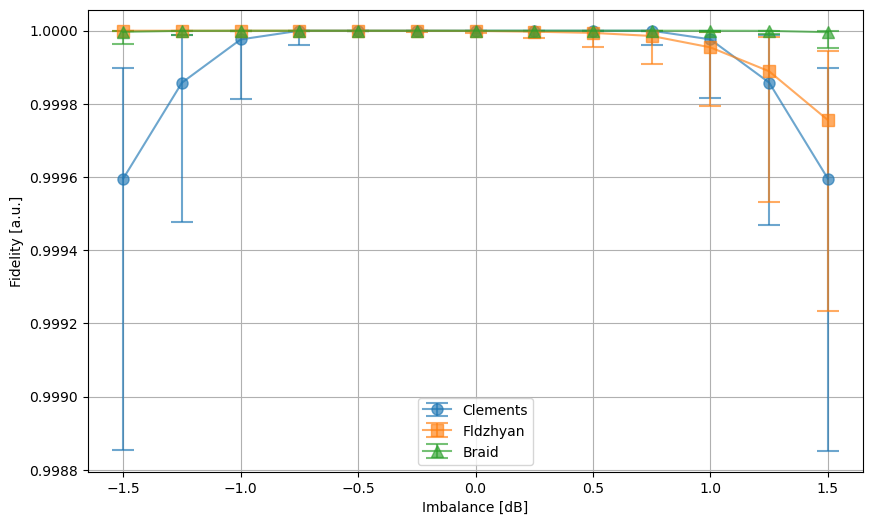

In [26]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Imbalance [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep IMB
IL_MMI=0.5dB \
IMB=SWEEP \
IL_CROSS=0.2dB \
CT=-35dB

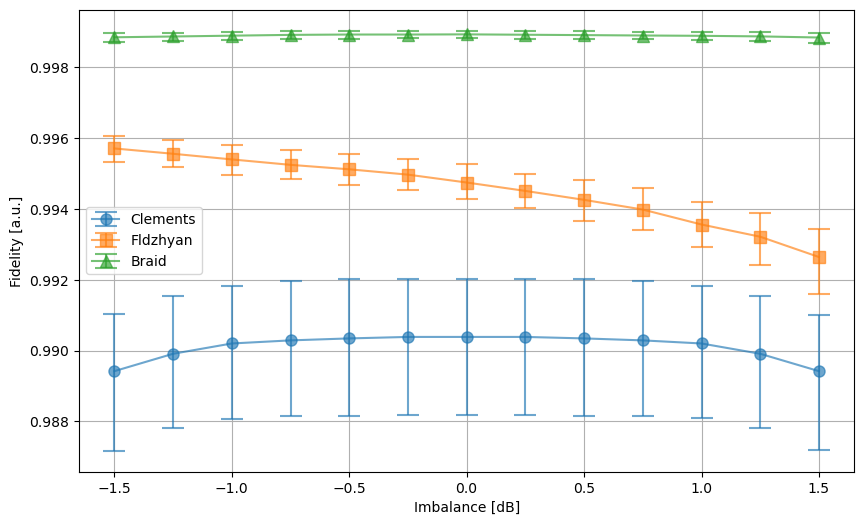

In [3]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Imbalance [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep N with fix imbalance

Best IMB for Fldzhyan architecture

IL_MMI=0.5dB \
IMB=-0.5dB \
IL_CROSS=0.2dB \
CT=-35dB

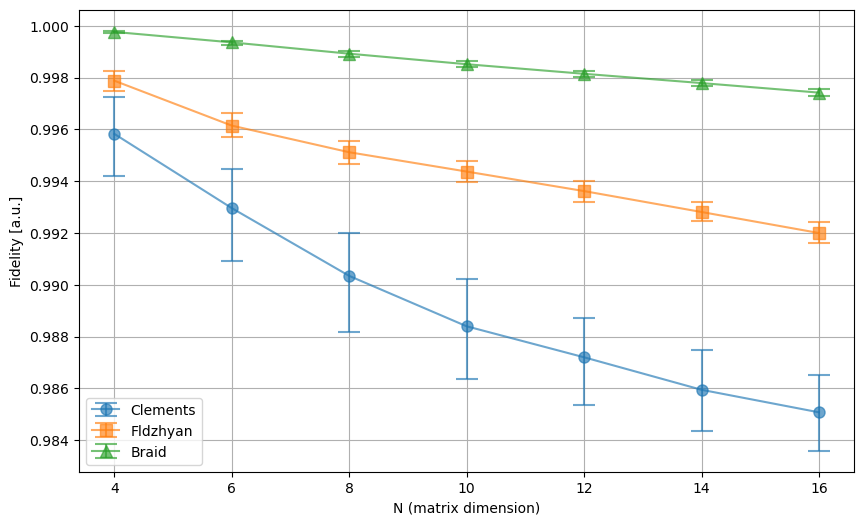

In [4]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=0, IL_MMI=-0.5, IMB=-0.5, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

# PhS Losses

## Sweep IL Phase Shifter
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

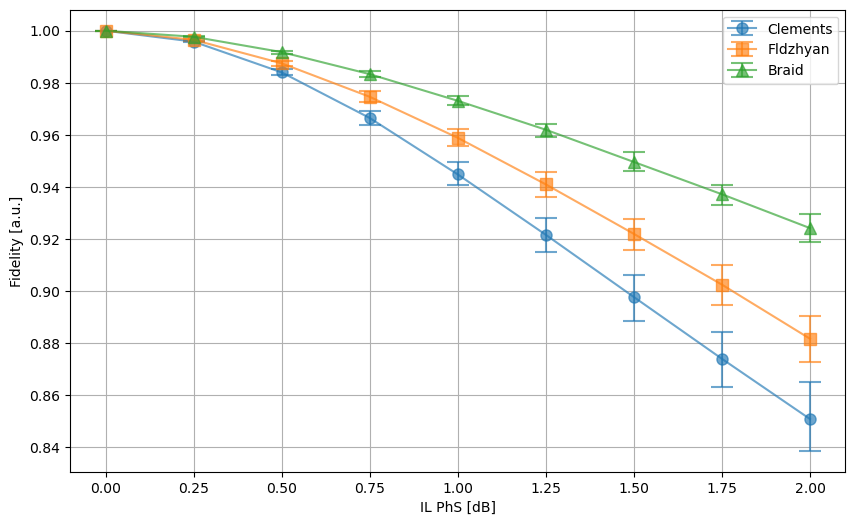

In [15]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0.0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('IL PhS [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep IL Phase Shifter
IL_MMI=0.5dB \
IMB=0dB \
IL_CROSS=0.2dB \
CT=-35dB

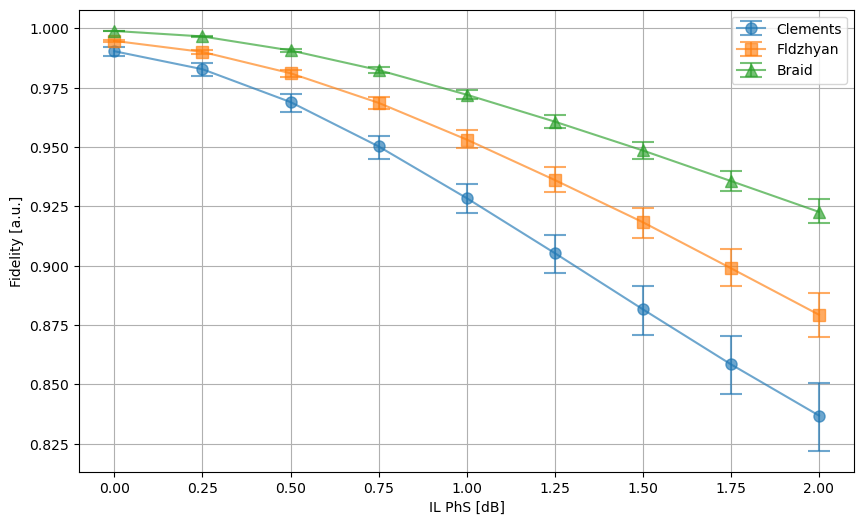

In [16]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('IL PhS [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep N with IL Phase Shifter

IL_PhS=1.0dB \
IL_MMI=0.5dB \
IMB=0dB \
IL_CROSS=0.2dB \
CT=-35dB

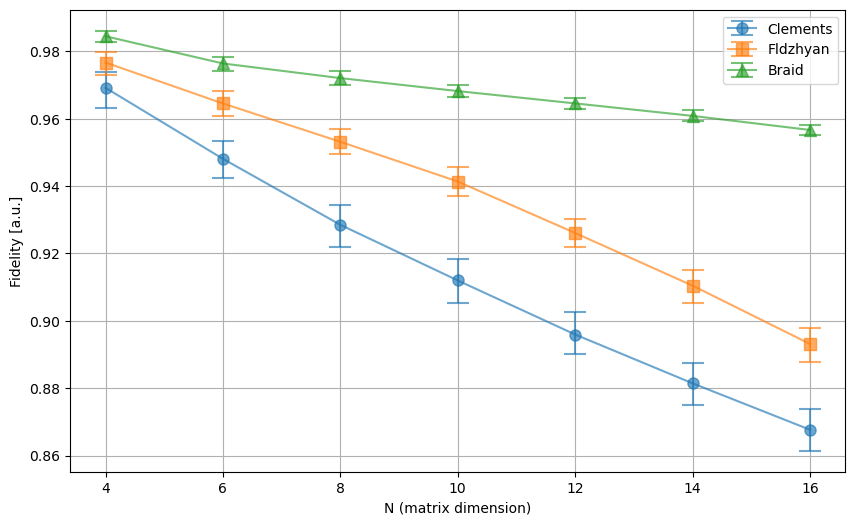

In [4]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian constant over time fabrication tollerance
----Phase Shifter---- \
IL PhS = 0.0 +- sweep \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

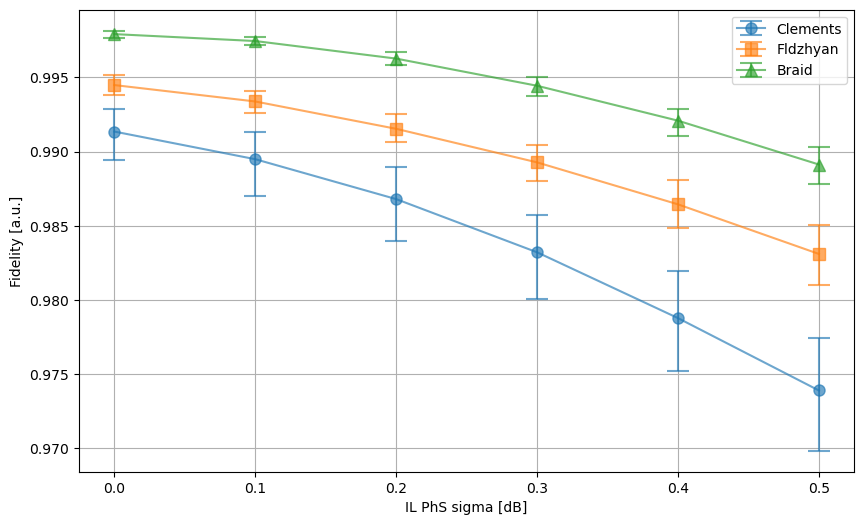

In [5]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=0, IMBMU=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('IL PhS sigma [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian constant with phase changers losses
----Phase Shifter---- \
IL PhS = 1 +- sweep \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

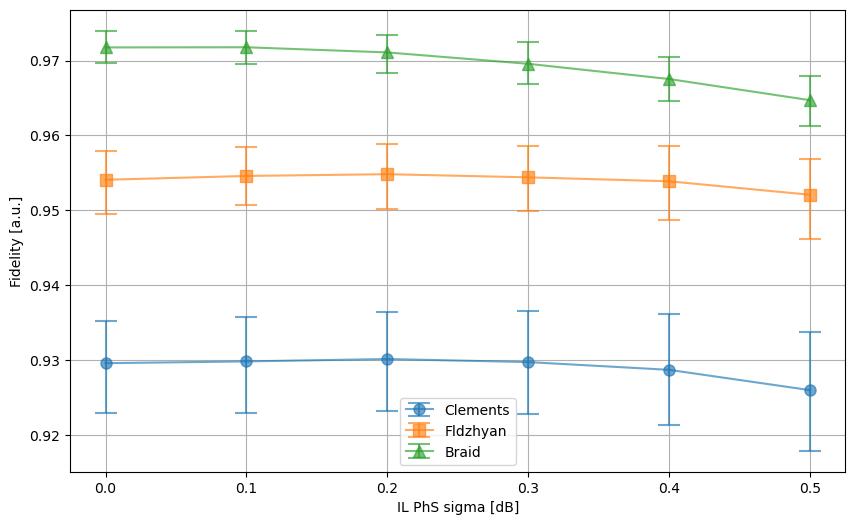

In [6]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, IMBMU=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('IL PhS sigma [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep N Gaussian constant
----Phase Shifter---- \
IL PhS = 1 +- 0.5 \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

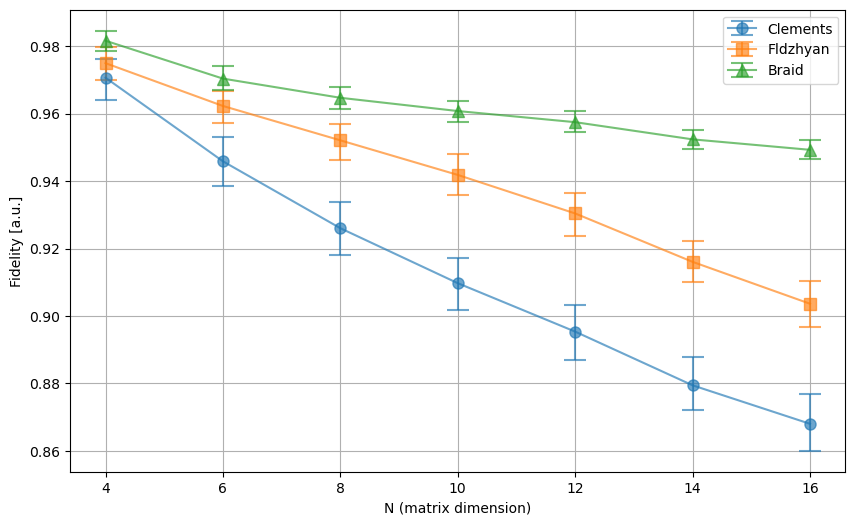

In [7]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, PCILSIGMA, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[1] == PCILSIGMA and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, PCILSIGMA=0.5, IMBMU=0.0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

# Architecture number components

In [44]:
import pandas as pd

def add_row_to_dataframe(df, name, n, n_mzi=None, n_mmi=None, n_crossing=None, n_ht_int=None, n_ht_ext=None):
    # Define the new row as a dictionary
    n_cros = 0 if not n_crossing else n_crossing
    new_row = pd.DataFrame({
        "name": [name],
        "n": [n],
        "n_mzi": [n_mzi],
        "n_mmi": [n_mmi],
        "n_crossing": [n_crossing],
        "n_ht_int": [n_ht_int],
        "n_ht_ext": [n_ht_ext],
        "n_ht": [n_ht_int+n_ht_ext],
        "n_tot": [n_ht_int+n_ht_ext+n_mmi+n_cros],
    })
    # Append the new row to the DataFrame
    df = pd.concat([df, new_row], ignore_index=True)
    return df

df_list = []

# MAIN ============================================================================================================
ns = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]

df = pd.DataFrame(columns=["name", "n", "n_mzi", "n_mmi", "n_crossing", "n_ht_int", "n_ht_ext", "n_ht", "n_tot",])

for n in ns:
    # Clements ========================================================================================================
    name = 'Clements_Arct'
    n_mzi = n*(n-1)//2
    n_mmi = n*(n-1)
    n_crossing = None
    n_ht_int = n*(n-1)
    n_ht_ext = n
    df = add_row_to_dataframe(df, name, n, n_mzi, n_mmi, n_crossing, n_ht_int, n_ht_ext)

    # Fldzhyan ========================================================================================================
    name = 'Fldzhyan_Arct'
    n_mzi = None
    n_mmi = n*(n-1)
    n_crossing = None
    n_ht_int = n*(n-1)
    n_ht_ext = n
    df = add_row_to_dataframe(df, name, n, n_mzi, n_mmi, n_crossing, n_ht_int, n_ht_ext)

    # NEUROPULS CrossingSide ==========================================================================================
    name = 'NEUROPULSCrossingSide_Arct'
    n_mzi = n*(n-1)//2
    n_mmi = n*(n-1)
    n_crossing = (n**2-4)//2
    n_ht_int = n*(n-1)
    n_ht_ext = n
    df = add_row_to_dataframe(df, name, n, n_mzi, n_mmi, n_crossing, n_ht_int, n_ht_ext)

## Total number of components

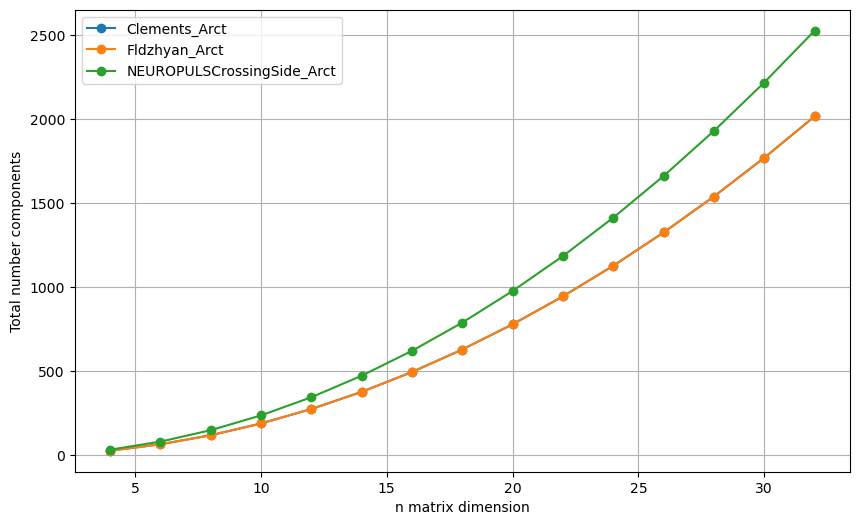

In [45]:
# Create the grapth
import matplotlib.pyplot as plt

name_models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    filtered_df = df[df['name'] == arct]
    ns = filtered_df['n'].tolist()
    n_tot = filtered_df['n_tot'].tolist()
    plt.plot(ns, n_tot, marker='o', label=arct)
plt.xlabel('n matrix dimension')
plt.ylabel('Total number components')
plt.legend()
plt.grid(True)
plt.show()

## Number of Phase shifters

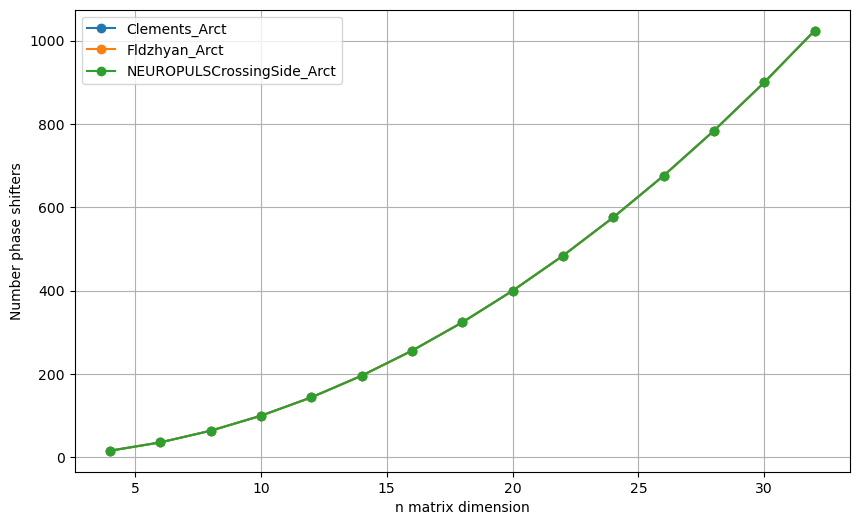

In [46]:
# Create the grapth
import matplotlib.pyplot as plt

name_models_choise = [
    'Clements_Arct', 
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    filtered_df = df[df['name'] == arct]
    ns = filtered_df['n'].tolist()
    n_tot = filtered_df['n_ht'].tolist()
    plt.plot(ns, n_tot, marker='o', label=arct)
plt.xlabel('n matrix dimension')
plt.ylabel('Number phase shifters')
plt.legend()
plt.grid(True)
plt.show()

# Grapths Power losses

## Sweep IMB
IL=-0.5dB \
CT=-30dB

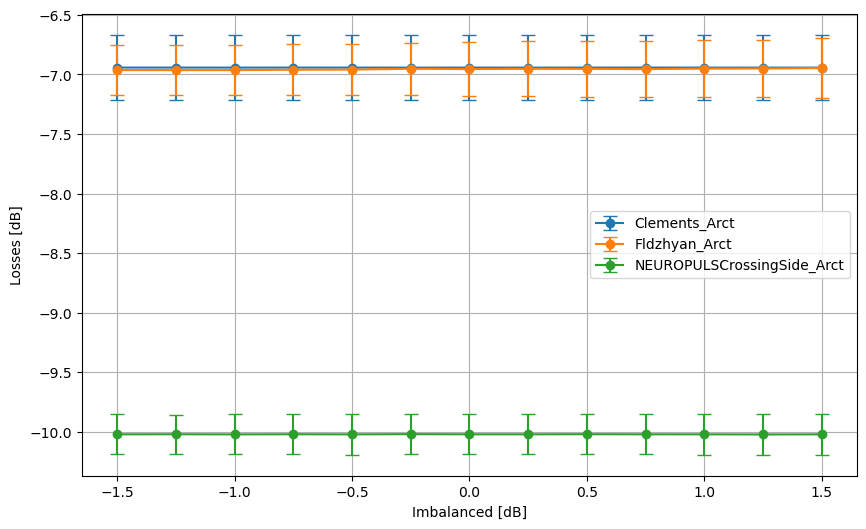

In [63]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240801_run_1_imb_losses/'
name_models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]


def filter_list_of_dicts(dict_list, IL, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL and list(dictionary.values())[3] == CT:
            filtered_list.append(dictionary)
    return filtered_list


plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    file_JSON = "20240801_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL=-0.5, CT=-30.0)
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    average = [sim["loss_average_dB"] for sim in filtered_list_disct]
    std_dev = [sim["loss_std_dev_dB"] for sim in filtered_list_disct]
    plt.errorbar(imbalances, average, yerr=std_dev,
                 marker='o', label=arct, capsize=5)
plt.xlabel('Imbalanced [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep PhaseChangers insertion loss
IL=-0.5dB \
IMB=-0.5dB \
CT=-30dB

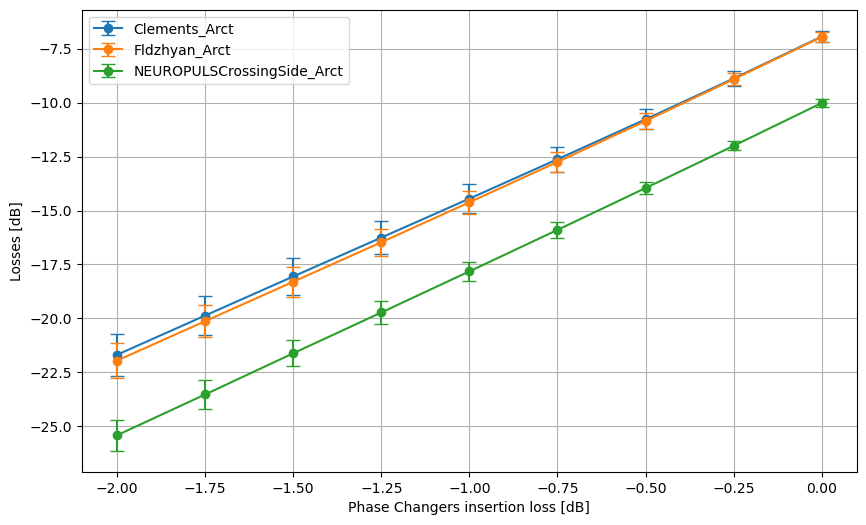

In [64]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240801_run_2_PCiloss_losses/'
name_models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

def filter_list_of_dicts(dict_list, IL, IMB, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL and list(dictionary.values())[2] == IMB and list(dictionary.values())[3] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    file_JSON = "20240801_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL=-0.5, IMB=-0.5, CT=-30.0)
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    average = [sim["loss_average_dB"] for sim in filtered_list_disct]
    std_dev = [sim["loss_std_dev_dB"] for sim in filtered_list_disct]
    plt.errorbar(PC_i_loss, average, yerr=std_dev,
                 marker='o', label=arct, capsize=5)
plt.xlabel('Phase Changers insertion loss [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np
# Define the matrix
matrix = np.array([[1, 1, 0, 0],
                   [2, 1, 0, 0],
                   [0, 0, 1, 1],
                   [0, 0, 2, -1]])

# Calculate the determinant
determinant_new_4 = np.linalg.det(matrix)

# Check if the determinant is non-zero and if so, calculate the inverse
if determinant_new_4 != 0:
    inverse_matrix_new_4 = np.linalg.inv(matrix)
else:
    inverse_matrix_new_4 = None

determinant_new_4, inverse_matrix_new_4

(2.9999999999999996,
 array([[-1.        ,  1.        ,  0.        ,  0.        ],
        [ 2.        , -1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.33333333,  0.33333333],
        [ 0.        ,  0.        ,  0.66666667, -0.33333333]]))